In [100]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image

import tensorflow as tf
from keras.src.legacy.preprocessing.image import ImageDataGenerator

import time
from IPython.display import clear_output

In [101]:

# adjust this path to your machine / file structure

base_file_path = 'C:/Users/nikoLocal/Documents/Opencampus/Machine_Vision_challenge_data/'

# Import random Test Dataset
labelled_csv_path = 'manual_label_df_submission.csv' #this is needed only for the file name list
#labelled_csv_path = 'manually_labelled_data/johannes_0_500/manual_label_df_submission.csv' #this is needed only for the file name list

submission_image_path = base_file_path + '/input_test_1a4aqAg/input_test'

labelled_df = pd.read_csv(os.path.join(base_file_path, labelled_csv_path))

#add another column to the dataframe according
dict_numbers = {'GOOD': 0, 'Boucle plate': 1, 'Lift-off blanc': 2, 'Lift-off noir': 3, 'Missing': 4,
                'Short circuit MOS': 5}
dict_strings = {'GOOD': '0_GOOD', 'Boucle plate': '1_Flat loop', 'Lift-off blanc': '2_White lift-off',
                'Lift-off noir': '3_Black lift-off', 'Missing': '4_Missing', 'Short circuit MOS': '5_Short circuit MOS'}

label_list = ['0_GOOD', '1_Flat loop', '2_White lift-off', '3_Black lift-off', '4_Missing', '5_Short circuit MOS']
#label_list.sort()

#Process label submission test dataframe
dict_strings_sub = {0: '0_GOOD', 1: '1_Flat loop', 2: '2_White lift-off', 3: '3_Black lift-off', 4: '4_Missing',
                    5: '5_Short circuit MOS', 6: '6_Drift'}


labelled_df.head()

,Unnamed: 0,filename,window,lib,Label,LabelStr,Predicted_Label,Manual_Label
0,0,15669dca9fa601ffded9be0f9cd48097d45e7e05d662b8...,2003,Die01,5,5_Short circuit MOS,4,4.0
1,1,16a9a7106da45758c103a182306d6e2991634e0574edce...,2003,Die01,1,1_Flat loop,4,4.0
2,2,216d84546bb291a840ac2ad0752a828f1f3d64abf79191...,2003,Die01,5,5_Short circuit MOS,4,4.0
3,3,219a89d631e95e19643566512d8bcc45233fe4fe0524c9...,2003,Die01,6,6_Drift,4,4.0
4,4,2a441bba89ae0a867b3ee938063d55538379f8e1298b3c...,2003,Die01,1,1_Flat loop,4,4.0


In [102]:
#extract only items with drift label class

Drift_df = labelled_df.loc[labelled_df['Manual_Label'] == 6]

In [103]:
labelled_df['Manual_Label'] == 6

0       False
1       False
2       False
3       False
4       False
        ...  
1050    False
1051    False
1052    False
1053    False
1054    False
Name: Manual_Label, Length: 1055, dtype: bool

In [104]:
Drift_df.head()

,Unnamed: 0,filename,window,lib,Label,LabelStr,Predicted_Label,Manual_Label
210,210,ccc96b6a4bd31f56301bca6c2b0991d6bf706064c23caf...,2005,Die01,6,6_Drift,2,6.0
214,214,d89ad9479b90f2a5afcc4662d29eb8d4307e5ff2bcb644...,2005,Die01,2,2_White lift-off,4,6.0
224,224,229590f8670436618a0d3e9ff1f63030959f6df6fc5fcb...,2005,Die02,6,6_Drift,3,6.0
320,320,ba7fec01bfa3dbefd42684162173d2ebb6bdb4d53ed0b6...,2005,Die04,6,6_Drift,4,6.0
326,326,d5dfdbefd899389cda3315695081a87164a6f970ed7001...,2005,Die04,5,5_Short circuit MOS,4,6.0


In [105]:
# initialize ImageDataGenerators
# use ImageDataGen because it has method flow_from_dataframe() that works really well together with pandas dataframes
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
# although deprecated the functionality can be used as discussed in feedback session


# HYPERPARAMTERS ########
target_size = (299,299) #pixel size to load img - needs to be identical to the model training. Now 299x299
class_mode = 'categorical' # how to store labels - either categorical (one-hot encoding) or as numbers
#class_mode = 'input'
batch_size = 8 #later player around with batch size to see how it affects performance
labelCol = 'LabelStr'
#########################

#normalize pixel intensities
rescale = 1.0/255.0

datagen_submission_test = ImageDataGenerator(
    horizontal_flip=False,
    vertical_flip=False,
    rotation_range=0.0,
    shear_range=0.0,
    rescale=rescale,
    validation_split=0.0)

##########################################################

#generator for submission test data

test_generator_submission = datagen_submission_test.flow_from_dataframe(
    Drift_df,
    submission_image_path,
    x_col='filename',
    y_col='LabelStr',
    target_size=target_size,
    keep_aspect_ratio = True,
    class_mode=class_mode,
    batch_size=1,
    color_mode="rgb", #also needs to be identical to model used
    shuffle=False,
    seed=42,
    subset='training')

Found 55 validated image filenames belonging to 7 classes.


In [107]:
# save to file
SavePath = base_file_path + '/DriftOnly.csv'
Drift_df.to_csv(SavePath, index=False)

In [98]:
SavePath

'C:/Users/nikoLocal/Documents/Opencampus/Machine_Vision_challenge_data//DriftOnly.csv'

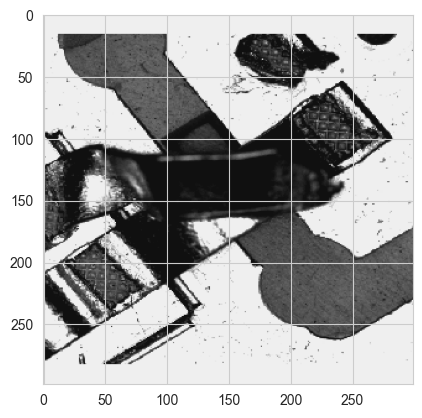

KeyboardInterrupt: Interrupted by user

In [108]:
# plot the images

i_run = 0
stop_index = 61

for data in test_generator_submission:

    if i_run >= stop_index:
        print("{} images plotted".format(i_run))
        break

    temp_img_generator = np.squeeze(data[0])

    plt.figure()
    plt.imshow(temp_img_generator, cmap='grey')
    plt.pause(0.5)

    Input_class = input("Press Enter to continue...")

    plt.close()

    #clear output after user input is registered
    clear_output()
    #move to next data point
    i_run = i_run + 1